In [4]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt


                                               nodes
0  {'id': '444150756', 'lat': '49.2635825', 'lon'...
1  {'id': '502425631', 'lat': '49.2733859', 'lon'...
2  {'id': '513053838', 'lat': '49.2772564', 'lon'...
3  {'id': '567142934', 'lat': '49.2631012', 'lon'...
4  {'id': '571309050', 'lat': '49.2846042', 'lon'...
{'id': '444150756', 'lat': '49.2635825', 'lon': '-123.1288360', 'tags': {'amenity': 'cafe', 'brand': 'Waves Coffee House', 'brand:wikidata': 'Q114096538', 'cuisine': 'coffee_shop', 'name': 'Waves Coffee House', 'opening_hours': 'Mo-Fr 06:00-24:00; Sa-Su 08:00-22:00', 'takeaway': 'yes'}}
          id         lat           lon     amenity               brand  \
0  444150756  49.2635825  -123.1288360        cafe  Waves Coffee House   
1  502425631  49.2733859  -123.1200283        cafe           Starbucks   
2  513053838  49.2772564  -123.1187370  restaurant                 NaN   
3  567142934  49.2631012  -123.1172946        cafe                 NaN   
4  571309050  49.2846042

In [10]:
def get_data(city):
    # Read the data from the JSON file
    # To load the data call python3 osm-get-city-restaurants.py first
    filename = f"../osm-{city.lower()}-restaurant-cuisine.json.gz"
    data = pd.read_json(filename, compression='gzip')

    # print(data.head())
    # print(data["nodes"][0])

    nodes = data["nodes"]


    df = pd.json_normalize(nodes)
    df.columns = df.columns.str.replace('tags.', '', regex=False)

    # Display the first few rows of the DataFrame to verify the structure
    # print(df.head())
    return df

def visualize_cuisine_distribution(df):
    cuisines = df["cuisine"]
    print(cuisines.value_counts())

    # Plot the top 20 cuisines
    cuisines.value_counts().head(20).plot(kind="bar")
    plt.show()


cuisine
coffee_shop                 26
american                     4
pizza                        4
vietnamese                   3
sushi                        3
japanese                     3
thai                         3
asian                        3
indian                       3
barbecue                     2
chinese                      2
breakfast                    2
bubble_tea                   2
bar&grill                    2
fusion                       1
burger;pizza                 1
pizza;comfort_food           1
korean                       1
tapas                        1
salad                        1
burger                       1
italian                      1
sushi;japanese               1
regional                     1
seafood;grill                1
steak_house                  1
seafood                      1
mexican                      1
sandwich                     1
coffee_shop;donut;bakery     1
Name: count, dtype: int64


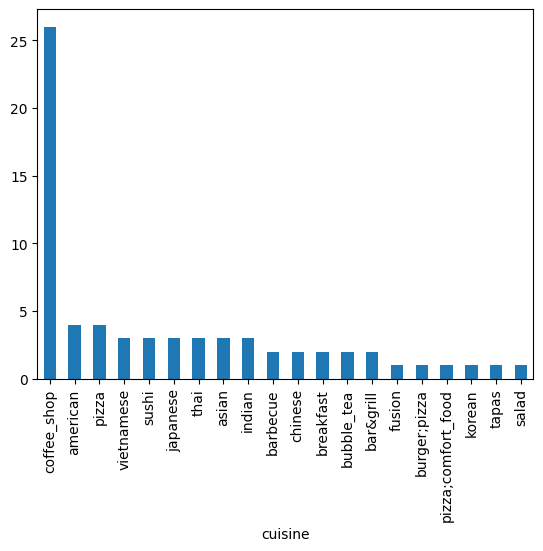

In [15]:
city = "Surrey"

df = get_data(city)
visualize_cuisine_distribution(df)